In [1]:
! pip install ipympl plotly

In [2]:
from google.colab import output
output.enable_custom_widget_manager()

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

In [4]:

# Read in a CSV file
! wget https://www.statlearning.com/s/Advertising.csv
adv = pd.read_csv('Advertising.csv')

--2024-03-19 19:22:36--  https://www.statlearning.com/s/Advertising.csv
Resolving www.statlearning.com (www.statlearning.com)... 198.185.159.144, 198.49.23.145, 198.185.159.145, ...
Connecting to www.statlearning.com (www.statlearning.com)|198.185.159.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe03b4091076ff5b30c72/1610604603901/Advertising.csv [following]
--2024-03-19 19:22:36--  https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe03b4091076ff5b30c72/1610604603901/Advertising.csv
Resolving static1.squarespace.com (static1.squarespace.com)... 151.101.0.238, 151.101.64.238, 151.101.128.238, ...
Connecting to static1.squarespace.com (static1.squarespace.com)|151.101.0.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4555 (4.4K) [text/csv]
Saving to: ‘Advertising.csv.2’

Advertising.csv.2   100%[===================>]   4.45K  --.-KB/s

In [5]:
# Make some better names for the variables of interest
xTV = adv['TV']
xRadio = adv['radio']
y = adv['sales']
n = len(xTV)

In [6]:
# Create a matrix of ones
X = np.ones((n, 3))
# Fill in columns 2-4 with our predictors
X[:, 1] = xTV
X[:, 2] = xRadio

In [7]:
# Calculate the coefficients using the normal equation
B = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

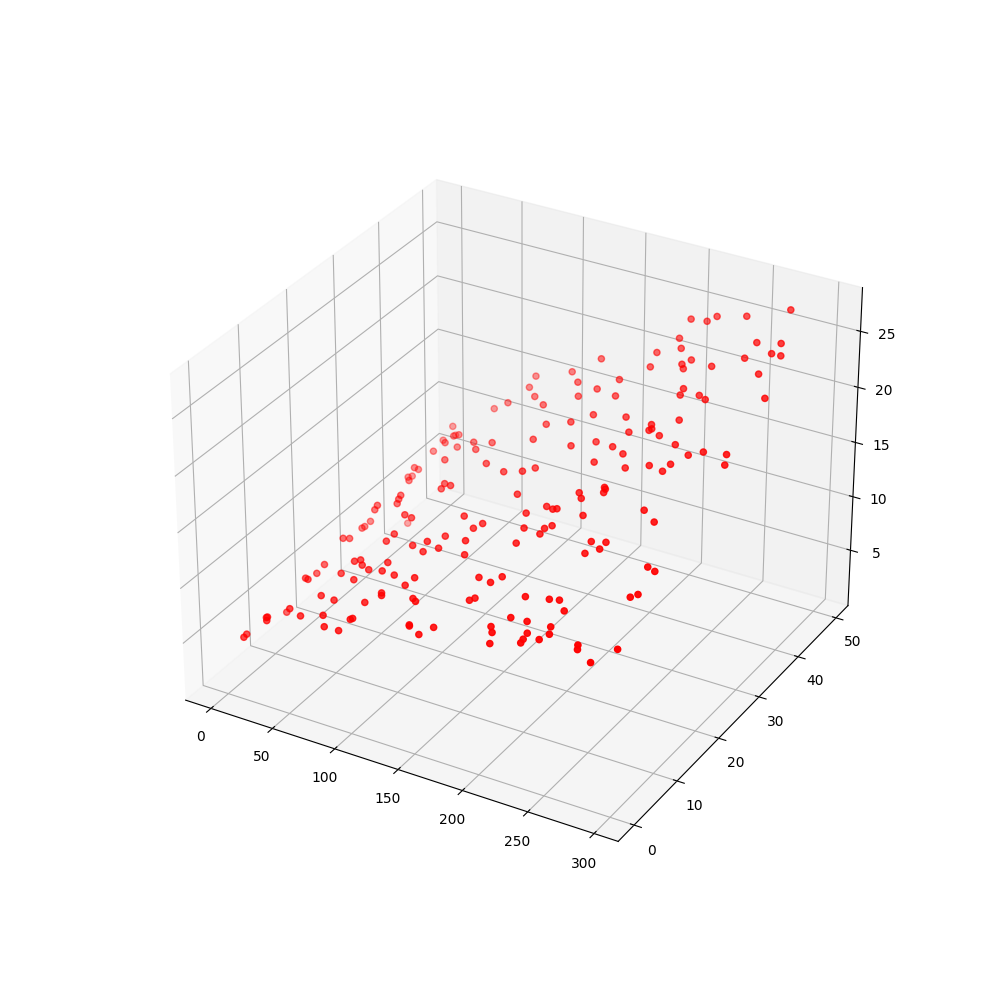

In [8]:
# Create a 3D visualization using Matplotlib
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xTV, xRadio, y, c='red')

In [9]:
# Create a meshgrid for the predicted values
xTV_grid, xRadio_grid = np.meshgrid(np.linspace(min(xTV), max(xTV), 20), np.linspace(min(xRadio), max(xRadio), 20))
predicted_y = B[0] + xTV_grid * B[1] + xRadio_grid * B[2]

In [10]:
# Plot the surface
ax.plot_surface(xTV_grid, xRadio_grid, predicted_y, alpha=0.5, color='blue')